In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load

In [18]:
data=pd.read_csv("iris.csv").drop("Id", axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Spilt Train and Test Set

In [19]:
classes = data['Species'].unique()
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for i in classes:
    train_data = pd.concat([train_data,data[data['Species'] == i].iloc[3:]],ignore_index=True)
    test_data = pd.concat([test_data,data[data['Species'] == i].iloc[:3]],ignore_index=True)
train_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.6,3.4,1.4,0.3,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...
136,6.7,3.0,5.2,2.3,Iris-virginica
137,6.3,2.5,5.0,1.9,Iris-virginica
138,6.5,3.0,5.2,2.0,Iris-virginica
139,6.2,3.4,5.4,2.3,Iris-virginica


This code segment takes a DataFrame with a 'Species' column and splits it into training and testing data. For each unique species, it extracts rows starting from index 3 for training and the first three rows for testing, then concatenates these rows into respective DataFrames. This approach prepares data for machine learning classification tasks.

In [20]:
test_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,7.0,3.2,4.7,1.4,Iris-versicolor
4,6.4,3.2,4.5,1.5,Iris-versicolor
5,6.9,3.1,4.9,1.5,Iris-versicolor
6,6.3,3.3,6.0,2.5,Iris-virginica
7,5.8,2.7,5.1,1.9,Iris-virginica
8,7.1,3.0,5.9,2.1,Iris-virginica


## 1A

In [21]:
train_data_A = train_data.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
test_data_A = test_data.drop(['PetalLengthCm', 'PetalWidthCm'], axis=1)
test_data_A

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,7.0,3.2,Iris-versicolor
4,6.4,3.2,Iris-versicolor
5,6.9,3.1,Iris-versicolor
6,6.3,3.3,Iris-virginica
7,5.8,2.7,Iris-virginica
8,7.1,3.0,Iris-virginica


In [22]:
X_train_A = train_data_A.iloc[:, :-1]
y_train_A = train_data_A.iloc[:, -1]
X_test_A = test_data_A.iloc[:, :-1]
y_test_A = test_data_A.iloc[:, -1]

removing Species column and creating a new dataframe

## Plot

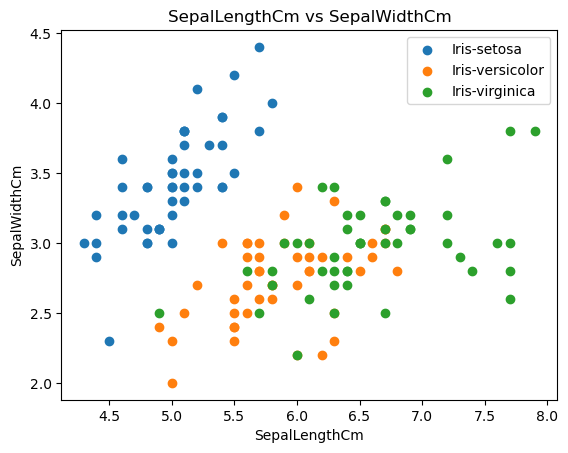

In [23]:
for Species,group in train_data_A.groupby('Species'):
    plt.scatter(group['SepalLengthCm'], group['SepalWidthCm'], label=Species)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.legend()
plt.show()

Plotting Sepal Length vs Sepal Width for iris-setosa, iris-versicolor and iris-virginica

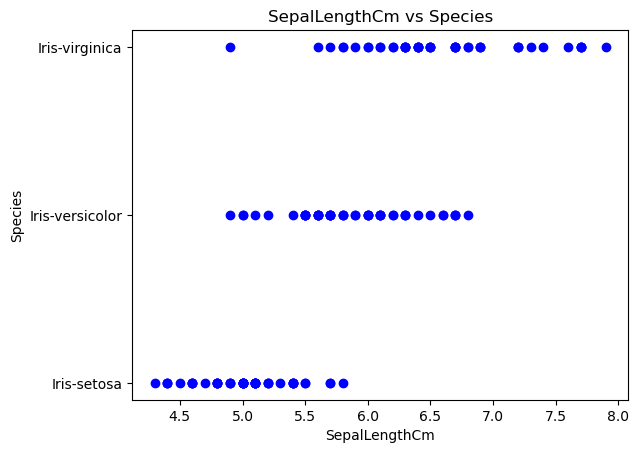

In [24]:
plt.scatter(train_data_A['SepalLengthCm'], train_data_A['Species'], color='blue')
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.title('SepalLengthCm vs Species')
plt.show()

Inference-1: SepalLengthCm of iris-setosa < SepalLength of iris-versicolor < SepalLength of iris-virginica

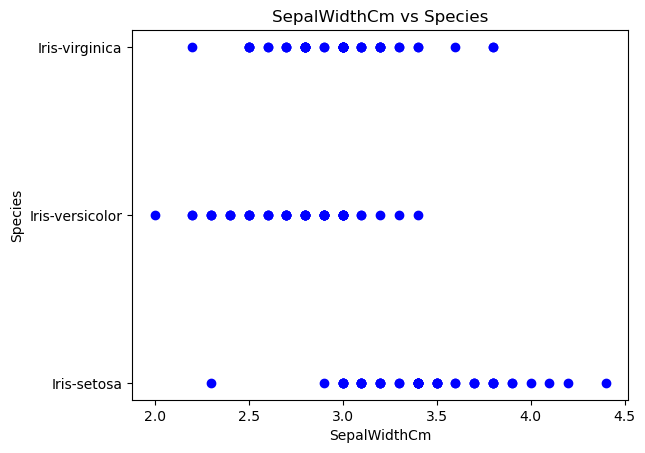

In [25]:
plt.scatter(train_data_A['SepalWidthCm'], train_data_A['Species'], color='blue')
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.title('SepalWidthCm vs Species')
plt.show()

**Inference-2:** SepalLengthCm of iris-setosa > SepalLength of iris-virginica < SepalLength of iris-versicolor

## Euclidean Distance Function

In [26]:
def euclidean_distance(X_train, X_test):
    dist = np.zeros((len(X_test), len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            dist[i,j] = np.sqrt(np.sum((X_test.iloc[i] - X_train.iloc[j])**2))
    return dist

This function calculates the pairwise Euclidean distances between instances in 'X_train' (training data) and 'X_test' (testing data). It initializes an empty distance matrix. It then iterates through each pair of instances and computes their Euclidean distance using the formula. The resulting distance matrix is returned, representing the distances between test instances and training instances.

## KNN Classification Function

In [27]:
def knn_classifier(distances, y_train, k):
    pred = []
    for dist in distances:
        k_nearest_indices = np.argsort(dist)[:k]
        k_nearest_labels = y_train.iloc[k_nearest_indices]
        pred.append(k_nearest_labels.mode()[0])
    return np.array(pred)

This function performs k-nearest neighbors (KNN) classification using given distances, training labels ('y_train'), and the value of 'k'. For each test instance, it identifies the indices of 'k' nearest neighbors by sorting distances in ascending order. It then retrieves the corresponding labels, finds the most common label among the neighbors, and assigns it as the predicted label for the test instance. The function returns an array of predicted labels for all test instances.

In [31]:
euclidean_dist_A = euclidean_distance(X_train_A, X_test_A)
k = 5
y_pred_A = knn_classifier(euclidean_dist_A, y_train_A, k)
compare_A = pd.DataFrame({'Actual': y_test_A, 'Predicted': y_pred_A})
compare_A

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-virginica
4,Iris-versicolor,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-versicolor
8,Iris-virginica,Iris-virginica


In [29]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

def accuracy_vs_k(distances, y_train, y_test, k_range):
    accuracies = []
    for k in k_range:
        y_pred = knn_classifier(distances, y_train, k)
        accuracies.append(accuracy(y_pred, y_test))
    return accuracies

The 'accuracy' function calculates the accuracy of predicted labels ('y_pred') compared to actual labels ('y_test'). It sums up the correct predictions and divides by the total number of instances in 'y_test'.

The 'accuracy_vs_k' function evaluates KNN classification accuracy across a range of values for 'k'. It iterates through each 'k' in 'k_range', predicts labels using 'knn_classifier', calculates accuracy using the 'accuracy' function, and appends accuracies to the 'accuracies' list. It returns a list of accuracy values corresponding to different 'k' values for evaluation.

In [30]:
print(f"Accuracy for k={k} is {accuracy(y_pred_A,y_test_A)}")

Accuracy for k=5 is 0.5555555555555556


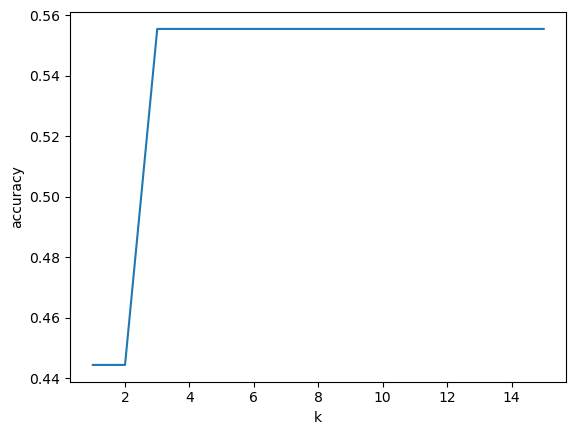

In [33]:
k_range = range(1,16)
accuracies_A = accuracy_vs_k(euclidean_dist_A, y_train_A, y_test_A, k_range)
plt.plot(k_range, accuracies_A)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

plot of k vs accuracy graph,
accuracy is same for k>=3

## 1B

In [35]:
X_train_B = train_data.iloc[:,:-1]
y_train_B = train_data.iloc[:, -1]
X_test_B = test_data.iloc[:, :-1]
y_test_B = test_data.iloc[:, -1]

In [36]:
euclidean_dist_B = euclidean_distance(X_train_B, X_test_B)
k = 5
y_pred_B = knn_classifier(euclidean_dist_B, y_train_B, k)
compare_B = pd.DataFrame({'Actual': y_test_B, 'Predicted': y_pred_B})
compare_B

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-virginica,Iris-virginica


In [37]:
print(f"Accuracy for k={k} is {accuracy(y_pred_B,y_test_B)}")

Accuracy for k=5 is 1.0


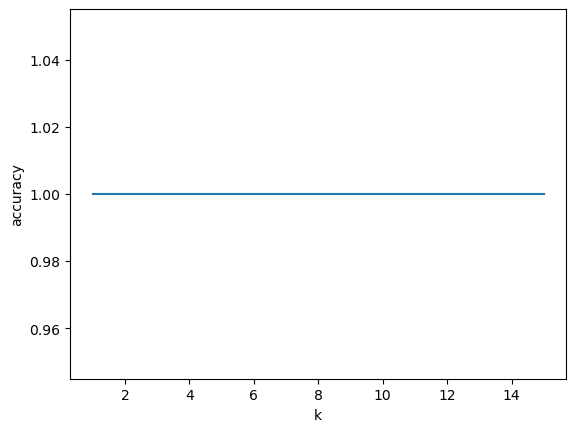

In [38]:
k_range = range(1,16)
accuracies_B = accuracy_vs_k(euclidean_dist_B, y_train_B, y_test_B, k_range)
plt.plot(k_range, accuracies_B)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

Accuracy is 100% for k >= 1